In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
pd.options.mode.chained_assignment = None
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn import metrics

# Load data

In [2]:
with open("data_processed_test.pkl", "rb") as f:
    train_data = pickle.load(f)
    train_label = pickle.load(f)
    test_data = pickle.load(f)
    test_label = pickle.load(f)
    label_list = pickle.load(f)

# Choose parameters

In [ ]:
# Choose parameters for RandomForest
def best_params(train_x, train_y):
    rfc = RandomForestClassifier()
    param_grid = { 
        'n_estimators': [50, 400],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    
    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
    CV_rfc.fit(train_x, train_y)
    return CV_rfc.best_params_

print(best_params(train_data.values, train_label.values))

# Random Forest

In [3]:
# RandomForest Classifier 
rf = RandomForestClassifier(n_estimators=400, max_features='log2').fit(train_data, train_label)
importances = rf.feature_importances_

In [4]:
feat_labels = train_data.columns[0:]
feat_labels

Index(['Age', 'Size', 'HasName_0', 'HasName_1', 'TimeofDay_lateday',
       'TimeofDay_midday', 'TimeofDay_morning', 'TimeofDay_night', 'WeekDay_0',
       'WeekDay_1', 'WeekDay_2', 'WeekDay_3', 'WeekDay_4', 'WeekDay_5',
       'WeekDay_6', 'IsIntact_0.0', 'IsIntact_1.0', 'Sex_Female', 'Sex_Male',
       'MixorMultipleorSimple_Mix', 'MixorMultipleorSimple_Multiple',
       'MixorMultipleorSimple_Simple', 'Group_Herding', 'Group_Hound',
       'Group_NonSporting', 'Group_PitBull', 'Group_Sporting', 'Group_Terrier',
       'Group_Toy', 'Group_Unknown', 'Group_Working', 'IsMixColor_0',
       'IsMixColor_1'],
      dtype='object')

In [5]:
indices = np.argsort(importances)[::-1]

In [6]:
for f in range(train_data.shape[1]):
    print("{0}. Feature {1}: {2}".format(f + 1, feat_labels[indices[f]], importances[indices[f]]))
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. Feature Age: 0.13620063665931156
2. Feature Size: 0.07913587590203902
3. Feature IsIntact_1.0: 0.06745131921865816
4. Feature IsIntact_0.0: 0.05878776721549411
5. Feature IsMixColor_0: 0.03077621854129137
6. Feature IsMixColor_1: 0.030561471482504245
7. Feature TimeofDay_lateday: 0.029296195258850636
8. Feature Sex_Male: 0.02719016611534852
9. Feature Sex_Female: 0.02718148913071368
10. Feature WeekDay_0: 0.02665533511146694
11. Feature WeekDay_4: 0.02650810027777637
12. Feature WeekDay_3: 0.026455171430516247
13. Feature MixorMultipleorSimple_Mix: 0.025868270286836966
14. Feature WeekDay_1: 0.025224104265042294
15. Feature WeekDay_2: 0.02513166839858911
16. Feature HasName_1: 0.024856556958679416
17. Feature Group_Sporting: 0.02474561352795013
18. Feature WeekDay_5: 0.024522401295688646
19. Feature TimeofDay_midday: 0.02417276487949374
20. Feature Group_Herding: 0.024062572217314244
21. Feature HasName_0: 0.02270066078763287
22. Feature WeekDay_6: 0.022515092092350985
23. Feature M

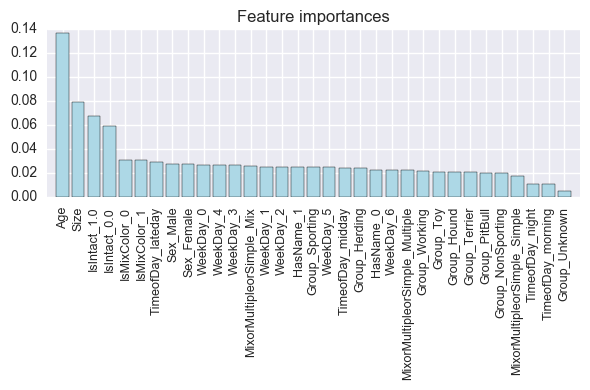

In [7]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_data.shape[1]), 
        importances[indices],
        color="lightblue", 
        align="center")
#plt.xticks(range(train_data.shape[1]), feat_labels, rotation = 90,fontsize=9)
plt.xticks(range(train_data.shape[1]), feat_labels[indices], rotation = 90,fontsize=9)
plt.xlim([-1, train_data.shape[1]])
#plt.show() 
plt.tight_layout(rect=[0,0,1,1], h_pad=0.0)
plt.savefig("RandomForest_Python_1.png")

In [8]:
plt.close

<function matplotlib.pyplot.close>

In [14]:
predict_label = rf.predict(test_data)

In [10]:
rf.score(test_data, test_label)

0.53290322580645166

In [11]:
accuracy = cross_val_score(rf, train_data, train_label, cv=7)
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.55 (+/- 0.02)


In [27]:
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives 
#and fp the number of false positives
#metrics.precision_score(test_label, predict_label, average='macro') 

In [26]:
# The F1 score can be interpreted as a weighted average of the precision and recall
#metrics.f1_score(test_label, predict_label, average='weighted')
metrics.f1_score(test_label, predict_label, average=None)

array([ 0.65282749,  0.        ,  0.19852941,  0.42944039,  0.48946295])

In [20]:
# The F-beta score is the weighted harmonic mean of precision and recall, use average=weighted -->
#metrics.fbeta_score(test_label, predict_label, average=None, beta=0.5) 

array([ 0.62414454,  0.        ,  0.23356401,  0.43807396,  0.50618673])

In [28]:
#label_list

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support

In [22]:
metrics.precision_recall_fscore_support(test_label, predict_label, beta=0.5, average=None)

(array([ 0.60638298,  0.        ,  0.26470588,  0.44402516,  0.51798561]),
 array([ 0.70697674,  0.        ,  0.15882353,  0.41578327,  0.46391753]),
 array([ 0.62414454,  0.        ,  0.23356401,  0.43807396,  0.50618673]),
 array([1290,   15,  170,  849,  776]))

In [29]:
#metrics.precision_score(test_label, predict_label, labels=[0, 2, 3,2], average='macro')